In [2]:
import glob
paths = glob.glob("img/*")
paths[:5]

['img\\all.mp4',
 'img\\baby_moon.jpg',
 'img\\baby_moon_detect.png',
 'img\\car.jpg',
 'img\\double_detect.png']

(825, 958, 4)


(-0.5, 957.5, 824.5, -0.5)

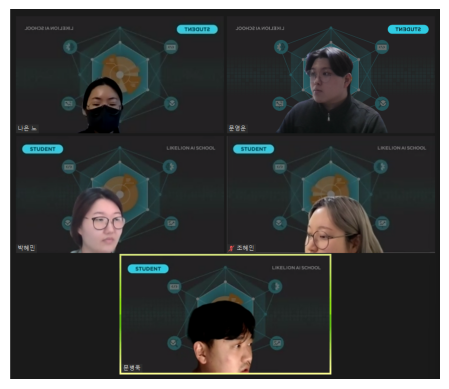

In [4]:
from PIL import Image
img = plt.imread(paths[-1])
print(img.shape)

plt.imshow(img)
plt.axis("off")

## 팀원들의 얼굴 탐지

In [3]:
import face_recognition
from PIL import Image, ImageDraw
import numpy as np


moon_image = face_recognition.load_image_file("img/moon.png")
print(moon_image.shape) # 생략 가능.
moon_face_encoding = face_recognition.face_encodings(moon_image)[0]


noh_image = face_recognition.load_image_file("img/noh.jpg")
print(noh_image.shape)
noh_face_encoding = face_recognition.face_encodings(noh_image)[0]

min_image = face_recognition.load_image_file("img/hye3.jpg")
print(min_image.shape)
min_face_encoding = face_recognition.face_encodings(min_image)[0]


in_image = face_recognition.load_image_file("img/in.png")
print(in_image.shape)
in_face_encoding = face_recognition.face_encodings(in_image)[0]


wook_image = face_recognition.load_image_file("img/byeong2.png")
print(wook_image.shape)
wook_face_encoding = face_recognition.face_encodings(wook_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    moon_face_encoding,
    noh_face_encoding,
    min_face_encoding,
    in_face_encoding,
    wook_face_encoding
]

known_face_names = [
    "Moon youngun",
    "Noh naeun",
    "Bak hyemin",
    "Jo hyein",
    "Moon byeongwook"
]

# Zoom 사진 가져오기.
unknown_image = face_recognition.load_image_file("img/yes.png")

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)


pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

del draw

pil_image.show()

# 탐지 결과를 이미지로 저장.
pil_image.save("img/image_with_boxes.jpg")

(284, 495, 3)
(1440, 1080, 3)
(2512, 1393, 3)
(262, 561, 3)
(201, 358, 3)


C:\Users\Naeun Noh\AppData\Local\Temp\ipykernel_4072\1639867137.py:82: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
C:\Users\Naeun Noh\AppData\Local\Temp\ipykernel_4072\1639867137.py:82: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
